<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Chapter_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.3 K Means Clustering with Scikit-Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('clustering.csv')
print(df.isnull().sum())
df.head()

X1    0
X2    0
dtype: int64


,X1,X2
0,-4.581081,-8.286462
1,-0.753894,1.864580
2,9.019485,0.356573
3,-3.293414,6.087256
4,7.042307,1.157019


In [2]:
df.describe()

,X1,X2
count,500.000000,500.000000
mean,-1.560198,1.453822
std,5.077718,6.713320
min,-11.043486,-11.727868
25%,-5.728146,-5.127837
50%,-2.371867,1.758263
75%,3.220747,7.714326
max,10.797640,16.719749


Text(0, 0.5, 'X2')

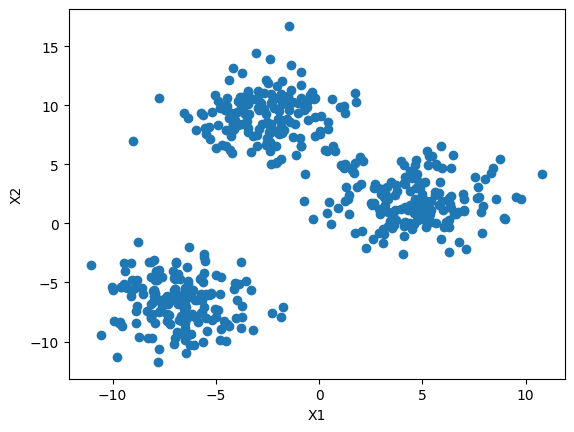

In [3]:
plt.scatter(df['X1'], df['X2'])
plt.xlabel('X1')
plt.ylabel('X2')

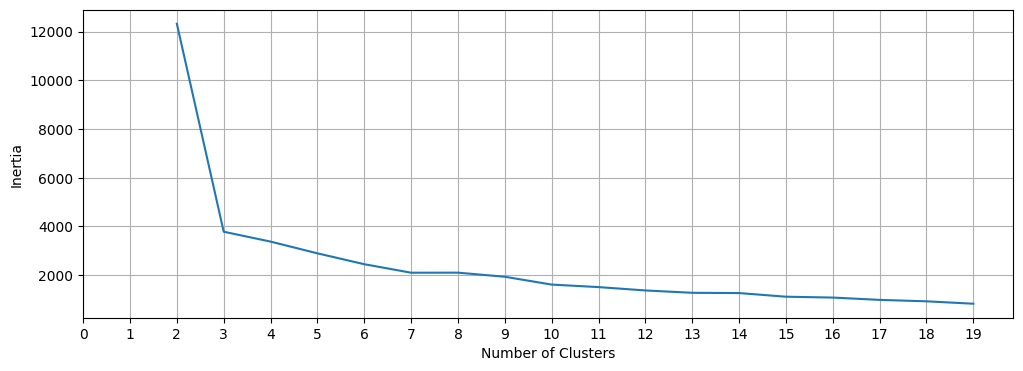

In [4]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 20):
    kmeans = KMeans(init='k-means++', random_state=0, n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(range(2, 20), inertias)
plt.xticks(range(0, 20))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
kmeans = KMeans(random_state=0, n_clusters=3)
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[-2.56005145  9.07257054]
 [-6.78277285 -6.63304128]
 [ 4.58815239  1.91636363]]


In [6]:
# Getting the cluster for the first row in df
print(kmeans.predict(df.loc[[0]]))

# Getting the cluster for a new point (-2, 10)
print(kmeans.predict([[-2, 10]]))

[1]
[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [7]:
df['Cluster'] = kmeans.labels_
df.head()

,X1,X2,Cluster
0,-4.581081,-8.286462,1
1,-0.753894,1.864580,2
2,9.019485,0.356573,2
3,-3.293414,6.087256,0
4,7.042307,1.157019,2


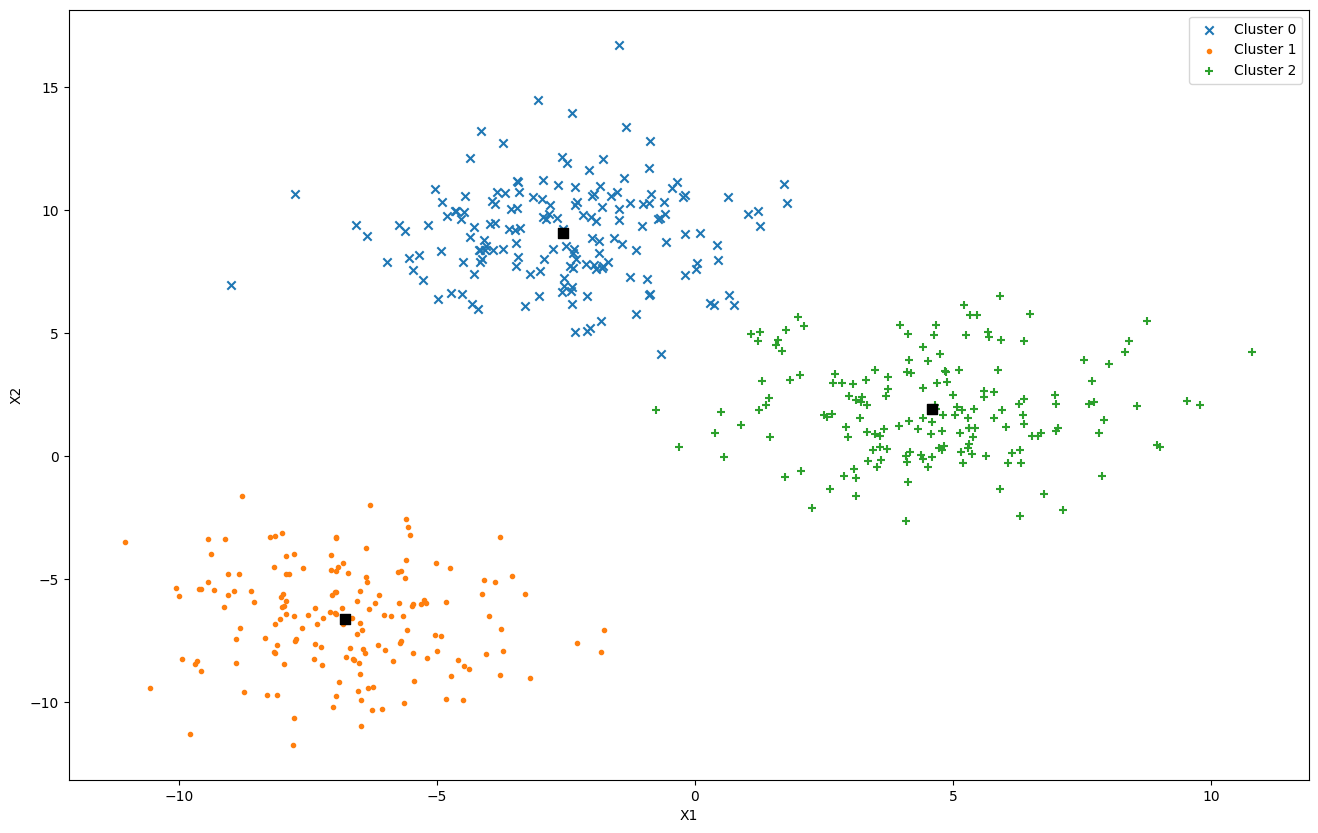

In [8]:
plt.figure(figsize=(16, 10))
markers = ['x', '.', '+']
for i in range(0, 3):
    cond = df['Cluster'] == i
    df2 = df[cond]
    plt.scatter(df2['X1'], df2['X2'], label = 'Cluster '+str(i), marker = markers[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 50, marker = "s")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()